In [1]:
import numpy as np 
import pandas as pd
import os
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(777) # 랜덤 시드 고정

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [2]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv", dtype=np.float32)
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv", dtype=np.float32)
sample_sub = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")

train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
X = train.drop('label',axis=1).values/255
y = train.label.values
print(X.shape, y.shape)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)
print(X.shape, y.shape)

(42000, 784) (42000,)
torch.Size([42000, 784]) torch.Size([42000])


Epoch    0/100 Cost: 2.319580
Epoch   10/100 Cost: 2.249843
Epoch   20/100 Cost: 1.941140
Epoch   30/100 Cost: 1.548997
Epoch   40/100 Cost: 1.167071
Epoch   50/100 Cost: 0.850040
Epoch   60/100 Cost: 0.708893
Epoch   70/100 Cost: 0.613454
Epoch   80/100 Cost: 0.540598
Epoch   90/100 Cost: 0.478584
예측 결과 : 2
이 이미지 데이터의 정답 레이블은 2입니다


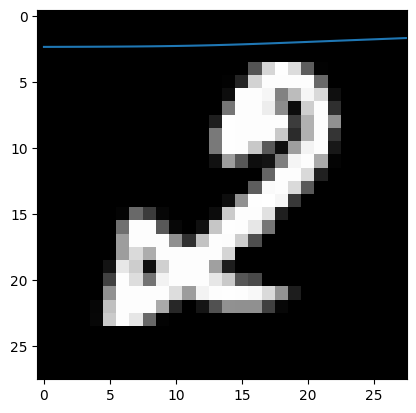

In [4]:
# 도구 임포트
import torch
import torch.nn as nn
from torch import optim
# 모델 정의
model = nn.Sequential(
  nn.Linear(784, 256),
  nn.ReLU(),
  nn.Linear(256, 100),
  nn.ReLU(),
  nn.Linear(100, 64),
  nn.ReLU(),
  nn.Linear(64, 32),
  nn.ReLU(),
  nn.Linear(32, 16),
  nn.ReLU(),
  nn.Linear(16, 10) 
)

# 비용함수 정의
loss_fn = nn.CrossEntropyLoss() # 이 비용 함수는 소프트맥스 함수를 포함하고 있음.

# 옵티마이저 정의
optimizer = optim.Adam(model.parameters())

# 손실값
losses = []

# 훈련 실행
for epoch in range(100):
  optimizer.zero_grad()
  y_pred = model(X) # forwar 연산
  loss = loss_fn(y_pred, y)
  loss.backward()
  optimizer.step()

  if epoch % 10 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, 100, loss.item()))

  losses.append(loss.item())

# 손실값 확인
import matplotlib.pyplot as plt
plt.plot(losses)

# 모델 테스트
import random

r = random.randint(0, len(X) - 1)
index = r
model.eval()
data = X[index]
output = model(data)
_, predicted = torch.max(output.data, 0)

print("예측 결과 : {}".format(predicted))

X_test_show = (X[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(y[index]))

In [5]:
X_test = test.values/255
X_test = torch.tensor(X_test, dtype=torch.float32)

In [6]:
with torch.no_grad():
    model.eval()
    sample_sub['Label'] = model(X_test).cpu().argmax(dim=1)

sample_sub.head()

sample_sub.to_csv("submission.csv", index=False)

In [7]:
sample_sub

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,2
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [8]:
sample_sub.to_csv("submission.csv", index=False)

-----

In [9]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob = 0.5
        # L1 ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            # feature map의 크기를 적당히 줄이며, 특정 feature를 강조, 채널 수 변화 x
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        # L2 ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        # L3 ImgIn shape=(?, 7, 7, 64)
        #    Conv      ->(?, 7, 7, 128)
        #    Pool      ->(?, 4, 4, 128)
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1))

        # L4 FC 4x4x128 inputs -> 625 outputs
        self.fc1 = torch.nn.Linear(4 * 4 * 128, 625, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight) # weight initialize
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            # overfitting 방지
            torch.nn.Dropout(p=1 - self.keep_prob))
        # L5 Final FC 625 inputs -> 10 outputs
        self.fc2 = torch.nn.Linear(625, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.layer4(out)
        out = self.fc2(out)
        return out

In [10]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [11]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# 데이터 로드
X = train.drop('label',axis=1).values/255
y = train.label.values
print(X.shape, y.shape)

X = X.reshape(-1, 1, 28, 28)

X_train = torch.tensor(X, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.int64)
print(X_train.shape, y_train.shape)

dataset = TensorDataset(X_train, y_train)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

(42000, 784) (42000,)
torch.Size([42000, 1, 28, 28]) torch.Size([42000])


In [12]:
cnn = CNN().to(device)

loss_fn = torch.nn.CrossEntropyLoss().to(device)    
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate)

total_batch = len(data_loader)
print('총 배치의 수 : {}'.format(total_batch))

costs = []

for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader: # 미니 배치 
        # image is already size of (28x28), no reshape
        X = X.to(device)
        Y = Y.to(device)
        
        optimizer.zero_grad()
        hypothesis = cnn(X)
        loss = loss_fn(hypothesis, Y)
        loss.backward()
        optimizer.step()

        avg_cost += loss / total_batch

    print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch + 1, training_epochs, loss.item()))
    costs.append(loss.item())

총 배치의 수 : 420
Epoch    1/15 Cost: 0.075608
Epoch    2/15 Cost: 0.010611
Epoch    3/15 Cost: 0.046258
Epoch    4/15 Cost: 0.011698
Epoch    5/15 Cost: 0.002849
Epoch    6/15 Cost: 0.006102
Epoch    7/15 Cost: 0.012527
Epoch    8/15 Cost: 0.012515
Epoch    9/15 Cost: 0.018945
Epoch   10/15 Cost: 0.007958
Epoch   11/15 Cost: 0.000043
Epoch   12/15 Cost: 0.000929
Epoch   13/15 Cost: 0.001126
Epoch   14/15 Cost: 0.000426
Epoch   15/15 Cost: 0.000549


In [13]:
X_test = torch.tensor(test.values, dtype=torch.float32).to(device)
X_test = X_test.reshape(-1, 1, 28, 28)
X_test.shape

torch.Size([28000, 1, 28, 28])

In [14]:
import torchvision.datasets as dsets

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 168427046.89it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 100694674.83it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 37404021.68it/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7629366.75it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [15]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = cnn(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

/opt/conda/lib/python3.10/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/opt/conda/lib/python3.10/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9828999638557434


In [16]:
X_test = torch.tensor(test.values, dtype=torch.float32).to(device)
X_test = X_test.reshape(-1, 1, 28, 28)
X_test.shape

with torch.no_grad():
    cnn.eval()
    sample_sub['Label'] = cnn(X_test).cpu().argmax(dim=1)

sample_sub.head()

sample_sub.to_csv("cnn_submission.csv", index=False)

In [17]:
sample_sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


-----

In [18]:
learning_rate = 0.0001
training_epochs = 15
batch_size = 16

In [19]:
import torchvision.models as models

res50 = models.resnet50(pretrained=True).to(device)
res50.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False).to(device)

loss_fn = nn.CrossEntropyLoss().to(device) 
optimizer = optim.Adam(res50.parameters(), lr=learning_rate)
# ReduceLROnPlateau : 학습률 감소 기법 중 하나로, 검증 손실이 더 이상 개선되지 않을 때 학습률을 동적으로 감소시켜 모델의 학습을 돕는 기법
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor = 0.1, patience=5)

num_ftrs = res50.fc.in_features
num_classes = len([i for i in range(10)])
res50.fc = nn.Sequential(
    nn.Dropout(0.5),  # 
    nn.Linear(num_ftrs, num_classes)  # Adjust num_classes according to your task
).to(device)

for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        X = X.to(device)
        Y = Y.to(device)
            
        optimizer.zero_grad()
        y_pred = res50(X)
        loss = loss_fn(y_pred, Y)
        losses.append(loss.item())
        loss.backward()
        optimizer.step()

    avg_cost /= len(data_loader)

    print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch + 1, training_epochs, loss.item()))  
    scheduler.step(avg_cost)
            
print('Training Done')

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 164MB/s]


Epoch    1/15 Cost: 0.283444
Epoch    2/15 Cost: 0.024086
Epoch    3/15 Cost: 0.031602
Epoch    4/15 Cost: 0.004816
Epoch    5/15 Cost: 0.007458
Epoch    6/15 Cost: 0.026808
Epoch    7/15 Cost: 0.008049
Epoch    8/15 Cost: 0.001743
Epoch    9/15 Cost: 0.004733
Epoch   10/15 Cost: 0.001880
Epoch   11/15 Cost: 0.002303
Epoch   12/15 Cost: 0.002447
Epoch   13/15 Cost: 0.000795
Epoch   14/15 Cost: 0.000340
Epoch   15/15 Cost: 0.000337
Training Done


In [20]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = res50(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

/opt/conda/lib/python3.10/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/opt/conda/lib/python3.10/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9949999451637268


In [21]:
X_test = torch.tensor(test.values, dtype=torch.float32).to(device)
X_test = X_test.reshape(-1, 1, 28, 28)
X_test.shape

with torch.no_grad():
    res50.eval()
    sample_sub['Label'] = res50(X_test).cpu().argmax(dim=1)

sample_sub.head()

sample_sub.to_csv("res50_submission.csv", index=False)

In [22]:
sample_sub

,ImageId,Label
0,1,3
1,2,8
2,3,8
3,4,8
4,5,3
...,...,...
27995,27996,8
27996,27997,7
27997,27998,3
27998,27999,3


-----